(confirmatory_fa-notebook)=
# Analisti Fattoriale Confermativa

Questo capitolo tratta l'analisi dei modelli di misurazione con fattori comuni e indicatori continui utilizzando la tecnica SEM dell'analisi fattoriale confermativa (CFA). La CFA differisce sostanzialmente dall'analisi fattoriale esplorativa (EFA) in quanto impiega un approccio più restrittivo alla modellazione dei dati. Nella CFA, il ricercatore definisce chiaramente tre aspetti cruciali del modello: (1) il numero preciso dei fattori, ad esempio tre; (2) la struttura esatta dei carichi fattoriali, determinando quale indicatore si associa a quali fattori; e (3) la potenziale presenza di errori correlati. 

Una caratteristica fondamentale della CFA è che ciascun indicatore è associato solo ai fattori specificati dal ricercatore, con tutte le altre possibili associazioni (saturazioni incrociate) fissate a zero. Al contrario, l'EFA, pur consentendo la specificazione del numero di fattori, analizza modelli non restrittivi dove ogni indicatore può associarsi a tutti i fattori, e il ricercatore non può disattivare questa impostazione di default, con tutti i carichi incrociati liberamente stimati.

Un altro aspetto distintivo riguarda l'identificazione dei modelli: mentre i modelli EFA con più fattori richiedono una specifica rotazione dei fattori, come quella obliqua (fattori covarianti) o ortogonale (fattori non correlati), la CFA non prevede una fase di rotazione, dato che il modello deve essere già identificato. Di conseguenza, i fattori nella CFA possono tipicamente covariare. Grazie ai requisiti di identificazione, la CFA permette la stima degli errori correlati in modo più diretto rispetto all'EFA, rendendola una tecnica più adatta per l'analisi delle strutture di covarianza dell'errore. In sintesi, la CFA offre un quadro metodologico più definito e restrittivo per la modellazione dei fattori comuni e degli indicatori continui, rispetto all'approccio più aperto e flessibile dell'EFA.

In [1]:
source("../_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semTools")
})
set.seed(42)

## EFA VERSUS CFA 

Sia la CFA (Confirmatory Factor Analysis) che la EFA (Exploratory Factor Analysis) si basano sul modello del fattore comune dal punto di vista della teoria classica dei test. 

Entrambe le tecniche suddividono la varianza osservata degli indicatori in varianza comune e varianza unica. La varianza comune è condivisa tra gli indicatori e costituisce la base per le covarianze osservate tra di essi che si discostano in modo apprezzabile da zero. I fattori che approssimano le variabili latenti sono "costruiti" dalla varianza comune e questi proxy sono chiamati fattori comuni. Il numero di fattori di interesse sostanziale è di solito inferiore al numero di indicatori.  La varianza unica consiste in varianza specifica e errore di misurazione casuale. La varianza specifica è variazione sistematica che non è spiegata da alcun fattore nel modello. Può essere dovuta a caratteristiche di indicatori individuali, come gli stimoli particolari che compongono un compito. Un'altra fonte è la varianza del metodo, ovvero l'uso di un particolare metodo di misurazione (ad esempio, autovalutazione) o informatore (ad esempio, genitori) per ottenere i punteggi.

Poiché la EFA è meno esigente della CFA, può essere preferita in aree di ricerca più recente dove la teoria sulla misurazione è debole in termini di numero di concetti teorici che dovrebbero essere approssimati o la corrispondenza tra fattori comuni e indicatori. Le fasi iniziali nella costruzione di test psicologici o questionari, specialmente quando c'è relativamente poca guida dalla teoria, è un contesto per cui la EFA è ben adatta. Ad esempio, se potrebbero esserci fattori inaspettati, ma sostanzialmente significativi, che si relazionano fortemente a sottoinsiemi di indicatori, allora la EFA sarebbe preferita rispetto alla CFA, che è meno flessibile qui (Flora & Flake, 2017).

In contrasto con il carattere guidato dai dati della EFA, la tecnica CFA è utilizzata per valutare quanto bene una soluzione fattoriale predefinita si adatta ai dati in un particolare campione. Un esempio sono le fasi successive della costruzione di test che seguono analisi più preliminari con la EFA in cui la dimensionalità di base degli indicatori è stata stabilita (Brown, 2015). Cioè, i risultati dalle precedenti applicazioni della EFA possono informare la specificazione dei modelli CFA in studi di validazione dei test successivi con dati raccolti in nuovi campioni. La tecnica della CFA può anche essere applicata per valutare l'effetto della revisione di un test consolidato aggiungendo o rimuovendo indicatori, come se la struttura fattoriale originale nel test modificato sia preservata nella revisione (Flora & Flake, 2017).

È stato menzionato che le ipotesi sugli errori di misurazione correlati possono essere facilmente testate nella CFA.  Un ruolo molto più controverso per la CFA è la sua applicazione immediatamente dopo aver mantenuto un modello di fattore nella EFA con l'obiettivo di "verificare" o "confermare" i risultati della EFA. In questo caso, il modello CFA ha lo stesso numero di fattori del modello EFA, ma alcuni o tutti i carichi incrociati sono vincolati a zero nel modello CFA. Non vengono raccolti nuovi dati, quindi sia i modelli EFA che CFA sono analizzati nello stesso campione. Ci sono due problemi qui: uno è che le due tecniche, EFA e CFA, potrebbero capitalizzare sulla stessa variazione casuale in un particolare campione, specialmente se lo stesso stimatore (ad esempio, massima verosimiglianza, ML) viene utilizzato in entrambe le analisi. Se un modello CFA mantenuto in questa situazione si replicherebbe in un nuovo campione è sconosciuto. 

Un secondo problema è che la specificazione di un modello CFA basato sui risultati della EFA e analizzato con gli stessi dati potrebbe portare al rifiuto del modello CFA. Questo perché gli indicatori nella EFA spesso hanno carichi secondari relativamente elevati su fattori diversi da quello per cui hanno il loro carico primario. Questi carichi secondari possono rappresentare proporzioni relativamente elevate di varianza, quindi vincolarli a zero nella CFA può essere troppo conservativo. Di conseguenza, il modello CFA più restrittivo potrebbe essere incoerente con i dati (van Prooijen & van der Kloot, 2001). La specificazione errata di carichi incrociati a zero può portare a una sovrastima delle correlazioni dei fattori (Asparouhov & Muthén, 2009). La replicazione dei risultati dell'analisi fattoriale, sia EFA che CFA, in nuovi campioni è una soluzione migliore—vedi Osborne e Fitzpatrick (2012) per una guida. Per essere chiari, applicare la CFA subito dopo la EFA nello stesso campione in nessun modo verifica, conferma o replica i risultati della EFA (Flora & Flake, 2017).

I due metodi alternativi di analisi fattoriale menzionati, che uniscono elementi sia della EFA (Exploratory Factor Analysis) che della CFA (Confirmatory Factor Analysis), offrono un approccio intermedio tra queste due tecniche tradizionali. Questi metodi sono:

1. **Exploratory Structural Equation Modeling (ESEM)**: In ESEM, il ricercatore stabilisce in anticipo il numero esatto di fattori, una caratteristica tipica della CFA. Tuttavia, a differenza della CFA, il modello di misurazione in ESEM non è ristretto. Ciò significa che tutti i possibili carichi incrociati (ossia, l'influenza di ciascun indicatore su tutti i fattori, non solo su quello a cui si presume sia maggiormente legato) sono considerati parametri liberi. Questo permette una maggiore flessibilità nell'esplorare le relazioni tra gli indicatori e i fattori, simile a ciò che accade nella EFA.

Inoltre, il modello ESEM utilizza una tecnica di rotazione, come si farebbe in EFA, per aiutare a identificare il modello più adatto. Questo approccio consente di avere una visione più chiara e dettagliata delle relazioni tra gli indicatori e i fattori.

ESEM fornisce anche misure di adattamento del modello, come gli errori standard per i parametri stimati liberamente e statistiche riguardanti sia l'adattamento globale del modello (ad esempio, il chi quadrato del modello) sia l'adattamento locale (come i residui standardizzati). Queste misure aiutano a valutare quanto bene il modello si adatta ai dati osservati, fornendo una comprensione più profonda della validità e affidabilità del modello.

2. **E/CFA**: Il secondo metodo alternativo di analisi fattoriale è definito come EFA in CFA (E/CFA), sviluppato da Jöreskog nel 1969. Questo approccio fonde aspetti sia dell'analisi fattoriale esplorativa (EFA) che di quella confermativa (CFA), cercando di sfruttare i vantaggi di entrambe le tecniche. 

In E/CFA, per ogni fattore viene selezionato un indicatore specifico che funge da variabile di riferimento. Questa scelta è cruciale perché, per l'indicatore selezionato, tutti i carichi incrociati (ossia, l'influenza di quell'indicatore sugli altri fattori) sono fissati a zero. Questo significa che l'indicatore scelto è considerato come rappresentativo principalmente del fattore a cui è associato, eliminando così la sua influenza diretta sugli altri fattori.

A differenza dell'indicatore di variabile di riferimento, per tutti gli altri indicatori, i carichi incrociati sono liberamente stimati. Questo permette una maggiore flessibilità nell'analisi, poiché ogni indicatore può potenzialmente influenzare tutti i fattori, fornendo una visione più ricca e complessa delle interrelazioni all'interno del modello.

Come nella EFA, anche nella E/CFA le covarianze tra i fattori sono liberamente stimate. Questo permette di esplorare e comprendere meglio come i diversi fattori possano essere correlati o influenzarsi reciprocamente all'interno del modello.

Un aspetto importante di E/CFA è la possibilità di stimare le covarianze degli errori. Se si osservano residui relativamente grandi tra coppie di indicatori, ciò può suggerire la necessità di considerare e stimare le covarianze degli errori. Questo aiuta a comprendere meglio la varianza all'interno del modello che non è spiegata dai fattori comuni.

In conclusione, E/CFA offre un approccio più flessibile rispetto alla CFA tradizionale, permettendo una maggiore esplorazione delle relazioni tra indicatori e fattori, simile a quella della EFA, ma con alcune restrizioni tipiche della CFA che aumentano la specificità e la chiarezza del modello. 

## Modelli di Base nella CFA

I modelli di base nella Confirmatory Factor Analysis (CFA) con più fattori sono riassunti di seguito:

- **Indicatori Continui e Due Cause**: Ogni indicatore è continuo e ha due cause: un fattore comune che approssima la variabile latente che l'indicatore dovrebbe misurare, e tutte le fonti di varianza unica — errore di misurazione casuale e varianza specifica non spiegata dal fattore — rappresentate dal termine di errore.
- **Termini di Errore Indipendenti**: I termini di errore sono indipendenti l'uno dall'altro e dai fattori; ciò significa che non ci sono confondenti non misurati per nessuna coppia di indicatori, e tutte le cause omesse non sono correlate ai fattori.
- **Relazioni Lineari e Covarianza dei Fattori**: Tutte le relazioni sono lineari e i fattori covariano (cioè, non ci sono effetti causali tra coppie di fattori).

Le prime due caratteristiche specificano una misurazione unidimensionale, o l'ipotesi che ciascun indicatore misuri una singola dimensione e non condivida nulla con altri indicatori dopo aver controllato i fattori comuni. 

Nella {numref}`kline-14-1-fig` è presentato un modello CFA di base con due fattori e sei indicatori. Tutti i carichi incrociati sono fissati a zero. Ad esempio, non c'è un effetto causale diretto dal fattore B all'indicatore X1, che è specificato come misura dell'altro fattore (cioè, A → X1). Tuttavia, questa specificazione non implica che X1 e il fattore B siano non correlati. Al contrario, il percorso aperto nel modello, o X1 ← A B, prevede che l'indicatore X1 e il fattore B dovrebbero covariare perché B è correlato con A, una causa di X1 (l'altra causa è E1, il suo termine di errore), ma questa associazione non è causale. Allo stesso modo, si prevede che gli indicatori X1 e X4 nella figura covarino perché le loro rispettive cause, i fattori A e B, sono correlate, o X1 ← A B → X4, e questo è vero anche se X1 e X4 si presume misurino cose diverse.

I valori (1) nella {numref}`kline-14-1-fig` sono costanti di scala che specificano metriche per variabili non misurate, che nei modelli CFA includono fattori comuni e termini di errore degli indicatori. 

```{figure} ../images/kline_14_1.png
---
height: 250px
name: kline-14-1-fig
---
Modello di analisi fattoriali confermativa con due fattori comuni e sei indicatori. (Figura tratta da {cite:t}`kline2023principles`)
```

Ogni fattore nella {numref}`kline-14-1-fig` è scalato attraverso il metodo della variabile di riferimento -- anche chiamato metodo della variabile marker o approccio di identificazione del carico di riferimento (Newsom, 2015) — dove un vincolo ULI è imposto sul carico di un indicatore per fattore. Ad esempio, la specificazione A→X1 = 1.0 nella figura scala la varianza del fattore A nella metrica della varianza comune (spiegata) dell'indicatore X1, la variabile di riferimento per il fattore A. Con la stessa logica, il computer stima la varianza del fattore B nella metrica della varianza comune in X4, la variabile marker per questo fattore. 

Se più indicatori per lo stesso fattore hanno punteggi ugualmente precisi e nessuno è considerato rappresentativo in modo critico del concetto sottostante, allora è generalmente arbitrario nelle analisi a campione singolo quale indicatore è selezionato come variabile di riferimento. Questo perché la scelta non influisce tipicamente su (1) l'adattamento globale del modello, (2) la soluzione standardizzata, o (3) le stime delle varianze di errore dell'indicatore nella soluzione non standardizzata. I carichi delle variabili di riferimento fissati a 1.0 rimangono tali nella soluzione non standardizzata e non hanno errori standard perché sono costanti, non variabili. Ciò significa che non c'è un test di significatività—una deviazione normale (z), o il rapporto di una statistica sul suo errore standard—per i carichi fissi delle variabili di riferimento, che è un possibile svantaggio del metodo se si desidera un test di significatività per tutti i carichi non standardizzati. Altre opzioni per la scala dei fattori che non richiedono la selezione di variabili di riferimento sono descritte nella sezione successiva.

Tutti i fattori nei modelli CFA di base sono variabili esogene che sono libere di variare e covariare. È possibile includere covariate nei modelli di misurazione, come l'età o altre caratteristiche dei partecipanti alla ricerca, che controllano potenziali confondenti o bias. Le covariate sono solitamente specificate come cause dei fattori comuni, che ridefiniscono anche tali fattori come variabili endogene con termini di disturbo (cioè, i fattori endogeni non sono liberi di variare né di covariare).

### Parametri del Modello nella CFA 

I parametri liberi dei modelli CFA (Confirmatory Factor Analysis) con indicatori continui, quando le medie non sono analizzate, includono le varianze e le covarianze delle variabili esogene e gli effetti diretti sulle variabili endogene (Regola 7.1). Per il modello base nella {numref}`kline-14-1-fig`, i parametri liberi includono:

1. **8 Varianze**: Queste comprendono le varianze di 2 fattori e dei 6 termini di errore degli indicatori.
2. **Una Singola Covarianza**: Questa è la covarianza tra i 2 fattori.
3. **4 Effetti Diretti dei Fattori sugli Indicatori (Carichi)**: Questi sono i carichi che non sono fissati per eguagliare le costanti di scala (ad esempio, i carichi per X2-X3 e X5-X6).

Il totale complessivo dei parametri liberi è quindi 13. Con v = 6 variabili osservate, il numero totale di osservazioni quando le medie non sono analizzate è 6(7)/2, ovvero 21 (Regola 7.2), quindi dfM = 21 – 13 = 8 per la Figura 14.1.

#### Requisiti di Identificazione Necessari ma Non Sufficienti nei Modelli CFA

Per garantire che un modello di CFA sia correttamente specificato e possa essere utilizzato per trarre conclusioni valide, è essenziale soddisfare due requisiti fondamentali di identificazione. Questi requisiti sono considerati necessari ma non sufficienti, il che significa che, anche se soddisfatti, potrebbero non essere adeguati da soli per assicurare l'identificazione completa del modello. Ecco una spiegazione più dettagliata di questi requisiti:

1. **Gradi di Libertà (dfM) Maggiori o Uguali a Zero**: 
   
   - **Calcolo dei Gradi di Libertà**: I gradi di libertà di un modello CFA sono calcolati sottraendo il numero di parametri liberi (ad esempio, varianze, covarianze, carichi fattoriali) dal numero totale di osservazioni indipendenti nei dati. Le osservazioni indipendenti sono tipicamente rappresentate dalle varianze e covarianze degli indicatori osservati. 
   - **Significato dei Gradi di Libertà**: Un numero positivo di gradi di libertà indica che ci sono abbastanza dati per stimare i parametri del modello e per testare l'adattamento del modello stesso. Se i gradi di libertà sono zero, il modello è detto "saturato", il che significa che si adatterà perfettamente ai dati ma senza fornire informazioni utili per la validazione. 
   - **Importanza dei Gradi di Libertà**: Avere dfM ≥ 0 è fondamentale perché assicura che il modello non sia sottospecificato. Un modello sottospecificato potrebbe portare a stime inaccurate e conclusioni fuorvianti.

2. **Scalatura di Ogni Variabile Non Misurata**: 
   
   - **Necessità della Scalatura**: Ogni variabile latente in un modello CFA, come un fattore, deve essere scalata per definirne l'unità di misura. Senza una scala definita, il modello non può determinare come interpretare le dimensioni della variabile latente.
   - **Metodi di Scalatura**: La scalatura può essere realizzata in diversi modi, ad esempio, fissando il carico di un indicatore per fattore a 1.0 (metodo di riferimento) o fissando la varianza del fattore a un valore specifico. 
   - **Implicazioni della Scalatura**: Fissare la scala delle variabili latenti è cruciale perché senza di essa, i parametri del modello, come i carichi fattoriali, rimarrebbero indeterminati. Questo significa che i valori stimati dipenderebbero dalle unità di misura scelte arbitrariamente, rendendo le interpretazioni relative e non generalizzabili.

In conclusione, la soddisfazione di questi due requisiti è fondamentale per stabilire un modello CFA di base che sia identificabile e interpretabile. Tuttavia, l'identificazione completa del modello potrebbe richiedere ulteriori considerazioni basate sulla specifica struttura e sulle ipotesi teoriche sottostanti il modello.

```{figure} ../images/kline_14_2.png
---
height: 450px
name: kline-14-2-fig
---
Scalatura dei fattori nel metodo della variabile di riferimento con vincoli di identificazione del carico unitario (ULI) (a), metodo di standardizzazione della variabile con vincoli di identificazione della varianza unitaria (UVI) (b) e metodo di codifica degli effetti con vincoli di identificazione della codifica degli effetti (ECI) (a + b + c)/3 = (d + e + f)/3 = 1.0 (c). Modelli presentati in simbolismo grafico compatto, e tutti i termini di errore degli indicatori sono scalati tramite vincoli ULI. (Figura tratta da {cite:t}`kline2023principles`)
```

#### Requisiti Sufficienti Aggiuntivi per l'Identificazione

Oltre ai requisiti base, ci sono ulteriori criteri che contribuiscono all'identificazione dei modelli CFA:

1. **Regola dei Tre Indicatori per i Modelli a Singolo Fattore**: Un modello CFA con un solo fattore deve avere almeno tre indicatori per essere identificato. Questo perché con solo due indicatori, c'è una mancanza di informazione sufficiente per distinguere la varianza e i carichi specifici del fattore da quelli degli errori di misurazione. Tuttavia, un modello con solo tre indicatori avrebbe esattamente dfM = 0, il che significa che si adatterebbe perfettamente ai dati ma non fornirebbe informazioni utili per ulteriori test o validazioni. Quindi, per avere gradi di libertà positivi (dfM > 0) e quindi spazio per la validazione del modello, sarebbero necessari almeno quattro indicatori.

2. **Regola dei Due Indicatori per i Modelli con Più Fattori**: Se un modello CFA ha due o più fattori, ciascun fattore deve avere almeno due indicatori. Questa regola aiuta a garantire che ogni fattore sia sufficientemente definito e differenziato dagli altri fattori nel modello. Tuttavia, i modelli con solo due indicatori per fattore possono essere problematici, specialmente in campioni piccoli, a causa di potenziali instabilità nelle stime e difficoltà nell'interpretazione.

In sintesi, questi requisiti di identificazione sono cruciali per garantire che un modello CFA sia sia teoricamente significativo (attraverso una corretta scalatura delle variabili latenti) sia praticamente utile (avendo abbastanza gradi di libertà per permettere la validazione e l'interpretazione del modello). La comprensione e l'adempimento di questi requisiti sono fondamentali per l'efficacia dell'analisi CFA nel campo della ricerca quantitativa.

#### Altri Metodi per la Scalatura dei Fattori nei Modelli CFA

La scalatura dei fattori in un modello di CFA è cruciale per assicurare la corretta identificazione e interpretazione dei fattori. Oltre al metodo della variabile di riferimento, ci sono altri due approcci principali per la scalatura dei fattori. Ecco una spiegazione più dettagliata di questi metodi:

1. **Metodo di Standardizzazione della Varianza (Variance Standardization Method)**:
   
   - **Standardizzazione dei Fattori**: Questo metodo standardizza i fattori fissando le loro varianze a 1.0. Questo vincolo è noto come unit variance identification (UVI). 
   - **Implicazioni**: Poiché i fattori sono standardizzati, le loro varianze non sono parametri liberi, ma le covarianze dei fattori sono liberamente stimate come correlazioni di Pearson. 
   - **Carichi degli Indicatori**: In questo metodo, i carichi di tutti gli indicatori sono parametri liberi, il che significa che ogni carico ha un errore standard nella soluzione non standardizzata e può essere testato per significatività statistica. 
   - **Vantaggi e Limitazioni**: Questo approccio ha il vantaggio della semplicità e non richiede la selezione di variabili di riferimento. Tuttavia, è generalmente applicabile solo ai fattori esogeni.

2. **Metodo di Codifica degli Effetti (Effects Coding Method)**:
   
   - **Principio di Funzionamento**: Questo metodo non richiede la selezione di variabili di riferimento e non standardizza i fattori. Si basa sulla capacità degli strumenti SEM moderni di imporre vincoli lineari su due o più stime dei parametri, in questo caso sui carichi non standardizzati per gli indicatori di un fattore comune.
   - **Vincolo di Codifica degli Effetti (ECI)**: Si specifica un vincolo ECI, il che significa che il carico medio degli indicatori dello stesso fattore equivale a 1.0 nella soluzione non standardizzata. Questo istruisce il computer a derivare carichi ottimali per un set di indicatori che in media sono 1.0.
   - **Stima della Varianza del Fattore**: Con questo approccio, la varianza del fattore è stimata come la varianza comune media attraverso tutti gli indicatori nella loro metrica originale, ponderata dal contributo di ciascun indicatore alla misurazione del fattore.
   - **Vantaggi**: Tutti gli indicatori contribuiscono alla scala del loro fattore comune. Questo può essere particolarmente utile in studi dove le varianze dei fattori forniscono informazioni sostanziali, come negli studi longitudinali sui fattori di crescita latente o quando si confrontano campioni da diverse popolazioni su fattori che sottostanno agli esiti osservati.

**Confronto tra i Metodi e Scelta del Metodo di Scalatura**

La scelta tra questi metodi dipende dall'obiettivo della ricerca e dalle specifiche del modello CFA. Ogni metodo ha vantaggi e limitazioni:

- Il **metodo di standardizzazione della varianza** è semplice e non richiede la selezione di variabili di riferimento, ma è più adatto per fattori esogeni e può non essere appropriato in tutte le situazioni.
- Il **metodo di codifica degli effetti** offre una stima più stabile della varianza del fattore che non si basa su un singolo indicatore, rendendolo utile in situazioni dove le varianze dei fattori sono di particolare interesse.

Importante notare che la scelta del metodo di scalatura non influisce sull'adattamento globale del modello, sulla soluzione standardizzata e sulle stime non standardizzate per i termini di errore. Tuttavia, le stime non standardizzate per altri parametri del modello dipendono dal metodo scelto. La decisione su quale metodo utilizzare dovrebbe essere guidata dalla natura dei dati, dagli obiettivi della ricerca e dalle specifiche teoriche del modello CFA impiegato.

## Modello CFA per le Abilità Cognitive

La prima edizione della Kaufman Assessment Battery for Children (KABC-I) (Kaufman & Kaufman, 1983) è un test di abilità cognitive somministrato individualmente per bambini dai 2 anni e mezzo ai 12 anni e mezzo. Gli autori del test sostenevano che gli otto sottotest rappresentati nella Figura 14.3 misurassero due fattori. I tre compiti nella figura, ritenuti riflettere l'elaborazione sequenziale, richiedono tutti il richiamo corretto di stimoli uditivi (Richiamo Numerico, Ordine delle Parole) o visivi (Movimenti della Mano) in un ordine particolare. Gli altri cinque compiti — dalla Chiusura Gestaltica alla Serie Fotografica nella figura — si presume misurino un ragionamento più olistico, meno dipendente dall'ordine, o un'elaborazione simultanea. Keith (1985) ha suggerito nomi alternativi per i fattori della KABC-I, tra cui "memoria a breve termine" invece di "elaborazione sequenziale" e "ragionamento visuo-spaziale" invece di "elaborazione simultanea".

In [2]:
# input the correlations in lower diagnonal form
kabcLower.cor <- "
 1.00
 .39 1.00
 .35  .67 1.00
 .21  .11  .16 1.00
 .32  .27  .29  .38 1.00
 .40  .29  .28  .30  .47 1.00
 .39  .32  .30  .31  .42  .41 1.00
 .39  .29  .37  .42  .58  .51  .42 1.00 "

# name the variables and convert to full correlation matrix
# hm, hand movements; nr, number recall; wo, word order; gc, gestalt closure;
# tr, triangles; sm, spatial memory; ma, matrix analogies; ps, photo series
kabc.cor <- lavaan::getCov(kabcLower.cor, names = c(
    "hm", "nr", "wo",
    "gc", "tr", "sm", "ma", "ps"
))
# display correlations
kabc.cor

,hm,nr,wo,gc,tr,sm,ma,ps
hm,1.00,0.39,0.35,0.21,0.32,0.40,0.39,0.39
nr,0.39,1.00,0.67,0.11,0.27,0.29,0.32,0.29
wo,0.35,0.67,1.00,0.16,0.29,0.28,0.30,0.37
gc,0.21,0.11,0.16,1.00,0.38,0.30,0.31,0.42
tr,0.32,0.27,0.29,0.38,1.00,0.47,0.42,0.58
sm,0.40,0.29,0.28,0.30,0.47,1.00,0.41,0.51
ma,0.39,0.32,0.30,0.31,0.42,0.41,1.00,0.42
ps,0.39,0.29,0.37,0.42,0.58,0.51,0.42,1.00


In [3]:
# add the standard deviations and convert to covariances
kabc.cov <- lavaan::cor2cov(kabc.cor, sds = c(3.40, 2.40, 2.90, 2.70, 2.70, 4.20, 2.80, 3.00))

# display covariances
kabc.cov

,hm,nr,wo,gc,tr,sm,ma,ps
hm,11.5600,3.1824,3.4510,1.9278,2.9376,5.7120,3.7128,3.978
nr,3.1824,5.7600,4.6632,0.7128,1.7496,2.9232,2.1504,2.088
wo,3.4510,4.6632,8.4100,1.2528,2.2707,3.4104,2.4360,3.219
gc,1.9278,0.7128,1.2528,7.2900,2.7702,3.4020,2.3436,3.402
tr,2.9376,1.7496,2.2707,2.7702,7.2900,5.3298,3.1752,4.698
sm,5.7120,2.9232,3.4104,3.4020,5.3298,17.6400,4.8216,6.426
ma,3.7128,2.1504,2.4360,2.3436,3.1752,4.8216,7.8400,3.528
ps,3.9780,2.0880,3.2190,3.4020,4.6980,6.4260,3.5280,9.000


```{figure} ../images/kline_14_3.png
---
height: 250px
name: kline-14-3-fig
---
Modello CFA per la Kaufman Assessment Battery for Children. (Figura tratta da {cite:t}`kline2023principles`)
```

#### Modello a Fattore Singolo

Nell'ambito della CFA, se il modello bersaglio ha due o più fattori, spesso il primo modello analizzato è un modello a fattore singolo. Se non si può rigettare un modello a fattore singolo, non ha molto senso valutare modelli con più fattori.

In [4]:
# single factor (general ability)
# indicator hm automatically
# specified as reference variable

kabc1.model <- "
    General =~ hm + nr + wo + gc + tr + sm + ma + ps 
"

In [5]:
# fit model to data
# variances calculated with N in the denominator, not N - 1
kabc1 <- lavaan::sem(kabc1.model, sample.cov = kabc.cov, sample.nobs = 200)

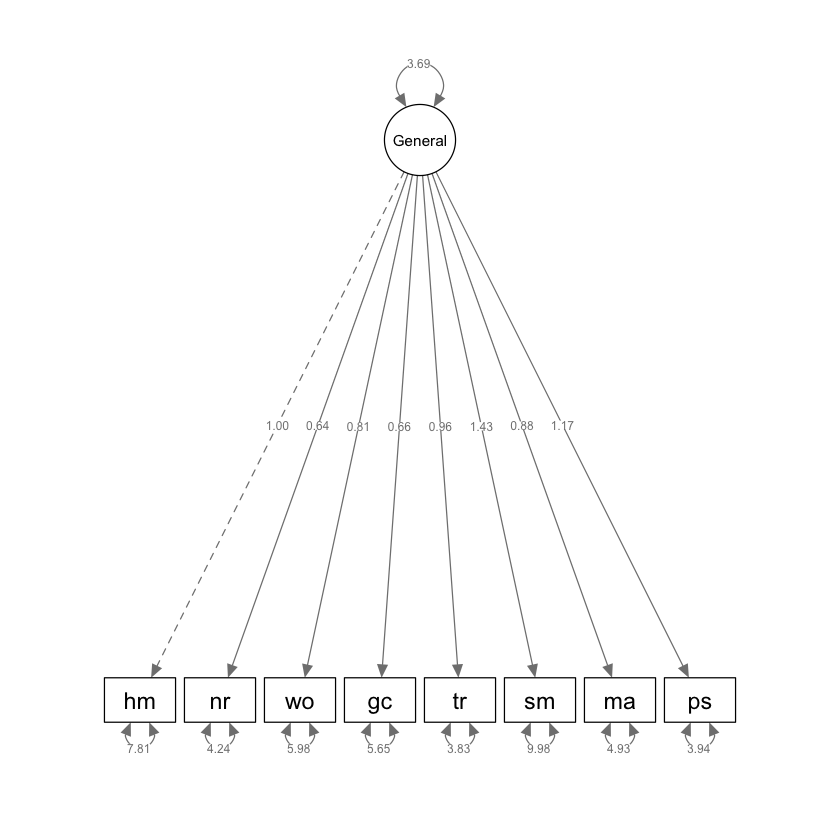

In [6]:
semPlot::semPaths(kabc1,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

In [7]:
lavaan::parameterEstimates(kabc1) |> 
    print()

       lhs op     rhs   est    se     z pvalue ci.lower ci.upper
1  General =~      hm 1.000 0.000    NA     NA    1.000    1.000
2  General =~      nr 0.636 0.111 5.708      0    0.418    0.854
3  General =~      wo 0.805 0.136 5.910      0    0.538    1.072
4  General =~      gc 0.659 0.123 5.361      0    0.418    0.900
5  General =~      tr 0.963 0.138 6.984      0    0.693    1.233
6  General =~      sm 1.433 0.211 6.796      0    1.019    1.846
7  General =~      ma 0.883 0.137 6.459      0    0.615    1.151
8  General =~      ps 1.166 0.159 7.324      0    0.854    1.478
9       hm ~~      hm 7.812 0.863 9.049      0    6.120    9.504
10      nr ~~      nr 4.240 0.456 9.294      0    3.345    5.134
11      wo ~~      wo 5.975 0.650 9.195      0    4.702    7.249
12      gc ~~      gc 5.652 0.599 9.432      0    4.478    6.827
13      tr ~~      tr 3.831 0.468 8.186      0    2.914    4.748
14      sm ~~      sm 9.979 1.179 8.463      0    7.668   12.290
15      ma ~~      ma 4.9

La saturazione non standardizzata per il compito "Movimenti della Mano" è stato fissato automaticamente a 1.0 per scalare il singolo fattore. I valori di alcune statistiche globali di adattamento per il modello a fattore singolo sono riportati di seguito:

In [8]:
parameterEstimates(kabc1, standardized = TRUE) %>%
    dplyr::filter(op == "=~") %>%
    dplyr::select(
        "Latent Factor" = lhs,
        Indicator = rhs,
        B = est,
        SE = se,
        Z = z,
        "p-value" = pvalue,
        Beta = std.all
    ) %>%
    knitr::kable(
        digits = 3, booktabs = TRUE, format = "markdown",
        caption = "Factor Loadings"
    )



Table: Factor Loadings

|Latent Factor |Indicator |     B|    SE|     Z| p-value|  Beta|
|:-------------|:---------|-----:|-----:|-----:|-------:|-----:|
|General       |hm        | 1.000| 0.000|    NA|      NA| 0.566|
|General       |nr        | 0.636| 0.111| 5.708|       0| 0.510|
|General       |wo        | 0.805| 0.136| 5.910|       0| 0.535|
|General       |gc        | 0.659| 0.123| 5.361|       0| 0.470|
|General       |tr        | 0.963| 0.138| 6.984|       0| 0.687|
|General       |sm        | 1.433| 0.211| 6.796|       0| 0.657|
|General       |ma        | 0.883| 0.137| 6.459|       0| 0.607|
|General       |ps        | 1.166| 0.159| 7.324|       0| 0.749|

Esaminiamo le misure di adattamento e i residui.

In [9]:
fitMeasures(kabc1, c("chisq", "df", "cfi", "tli", "rmsea", "srmr")) |>
    print()

  chisq      df     cfi     tli   rmsea    srmr 
105.427  20.000   0.818   0.746   0.146   0.084 


In [10]:
lavaan::residuals(kabc1, type = "raw") |>
    print()

$type
[1] "raw"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr  0.820  0.000                                          
wo  0.462  2.751  0.000                                   
gc -0.513 -0.836 -0.711  0.000                            
tr -0.631 -0.519 -0.602  0.415  0.000                     
sm  0.397 -0.452 -0.863 -0.097  0.212  0.000              
ma  0.437  0.069 -0.199  0.186  0.022  0.131  0.000       
ps -0.345 -0.659 -0.263  0.550  0.530  0.229 -0.289  0.000



In [11]:
lavaan::residuals(kabc1, type = "standardized.mplus") |>
    print()

$type
[1] "standardized.mplus"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr  2.062  0.000                                          
wo  1.026  6.218  0.000                                   
gc -1.231 -2.727 -1.952  0.000                            
tr -2.200 -2.364 -2.355  1.379  0.000                     
sm  0.723 -1.188 -1.995 -0.210  0.596  0.000              
ma  1.086  0.237 -0.601  0.544  0.089  0.313  0.000       
ps -1.241 -3.422 -1.037  1.833  2.178  0.675 -1.375  0.000



In [12]:
lavaan::residuals(kabc1, type = "cor.bollen") |>
    print()

$type
[1] "cor.bollen"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr  0.101  0.000                                          
wo  0.047  0.397  0.000                                   
gc -0.056 -0.130 -0.091  0.000                            
tr -0.069 -0.080 -0.077  0.057  0.000                     
sm  0.028 -0.045 -0.071 -0.009  0.019  0.000              
ma  0.046  0.010 -0.025  0.025  0.003  0.011  0.000       
ps -0.034 -0.092 -0.030  0.068  0.066  0.018 -0.035  0.000



Il modello a fattore singolo non supera il test del rapporto chi-quadro/df, e il limite inferiore dell'intervallo di confidenza al 90% del RMSEA, o .119, supera .10, che è un risultato scarso. Anche i risultati per CFI e SRMR sono sfavorevoli. Anche i residui per questa analisi indicano che l'adattamento locale è scadente. Pertanto, il modello a fattore singolo per la KABC-I è rigettato.

#### Modello a Due Fattori

In una seconda analisi, il modello a due fattori nella {numref}`kline-14-3-fig` è stato adattato ai dati. 

In [13]:
kabc2_model <- "
    Sequent =~ hm + nr + wo
    Simultan =~ gc + tr + sm + ma + ps 
"

In [14]:
kabc2 <- lavaan::sem(kabc2_model, sample.cov = kabc.cov, sample.nobs = 200)

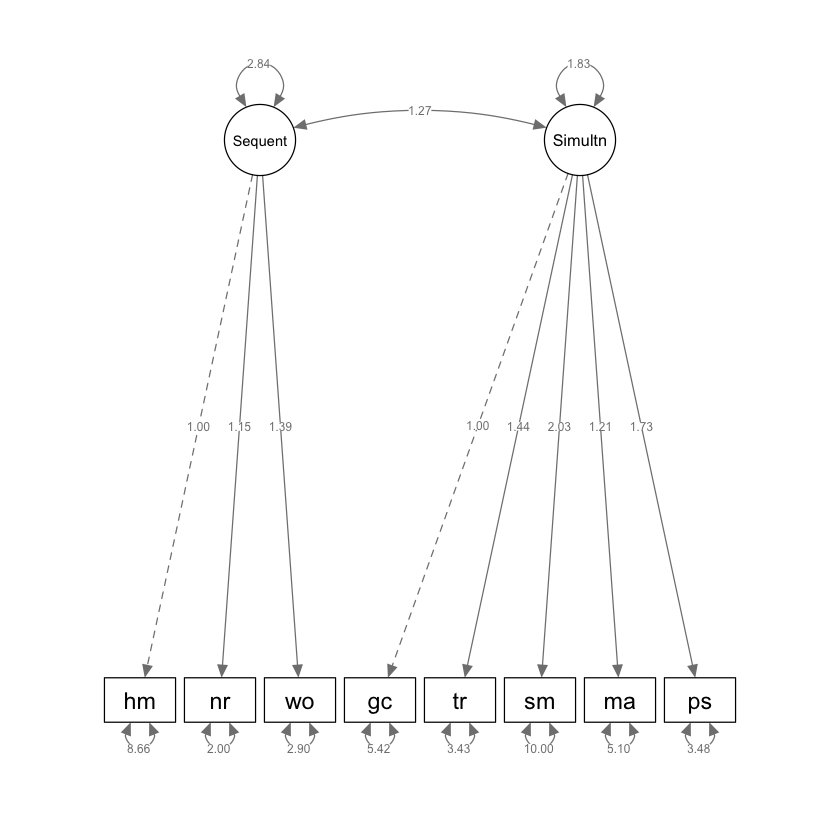

In [15]:
semPlot::semPaths(kabc2,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

In [16]:
lavaan::parameterEstimates(kabc2) |>
    print()

        lhs op      rhs   est    se     z pvalue ci.lower ci.upper
1   Sequent =~       hm 1.000 0.000    NA     NA    1.000    1.000
2   Sequent =~       nr 1.147 0.181 6.341  0.000    0.792    1.501
3   Sequent =~       wo 1.388 0.219 6.340  0.000    0.959    1.817
4  Simultan =~       gc 1.000 0.000    NA     NA    1.000    1.000
5  Simultan =~       tr 1.445 0.227 6.352  0.000    0.999    1.890
6  Simultan =~       sm 2.029 0.335 6.062  0.000    1.373    2.685
7  Simultan =~       ma 1.212 0.212 5.717  0.000    0.797    1.628
8  Simultan =~       ps 1.727 0.265 6.521  0.000    1.208    2.246
9        hm ~~       hm 8.664 0.938 9.237  0.000    6.826   10.502
10       nr ~~       nr 1.998 0.414 4.831  0.000    1.188    2.809
11       wo ~~       wo 2.902 0.604 4.801  0.000    1.717    4.087
12       gc ~~       gc 5.419 0.585 9.261  0.000    4.272    6.566
13       tr ~~       tr 3.426 0.458 7.479  0.000    2.528    4.323
14       sm ~~       sm 9.997 1.202 8.320  0.000    7.642   12

In [17]:
standardizedSolution(kabc2)

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sequent,=~,hm,0.4967517,0.06185190,8.031309,8.881784e-16,0.3755242,0.6179792
Sequent,=~,nr,0.8070386,0.04626958,17.442098,0.000000e+00,0.7163519,0.8977253
Sequent,=~,wo,0.8082004,0.04624070,17.478118,0.000000e+00,0.7175703,0.8988305
Simultan,=~,gc,0.5029005,0.06088027,8.260485,2.220446e-16,0.3835774,0.6222236
Simultan,=~,tr,0.7264627,0.04412957,16.462040,0.000000e+00,0.6399703,0.8129550
Simultan,=~,sm,0.6560490,0.04959951,13.226925,0.000000e+00,0.5588358,0.7532623
Simultan,=~,ma,0.5878905,0.05485948,10.716298,0.000000e+00,0.4803679,0.6954131
Simultan,=~,ps,0.7817406,0.04012341,19.483401,0.000000e+00,0.7031001,0.8603810
hm,~~,hm,0.7532377,0.06145007,12.257719,0.000000e+00,0.6327978,0.8736777


In [18]:
0.4967517 * 0.5569247
0.8070386 * 0.5569247
0.8082004 * 0.5569247

[1] 0.2766533

[1] 0.4494597

[1] 0.4501068

In [19]:
fitMeasures(kabc2, c("chisq", "df", "cfi", "tli", "rmsea", "srmr")) |>
    print()

 chisq     df    cfi    tli  rmsea   srmr 
38.325 19.000  0.959  0.939  0.071  0.072 


Un modello di analisi dei fattori confermativi (CFA) che impiega un singolo fattore può essere considerato come un caso particolare, o un "sottoinsieme", di modelli CFA con due o più fattori che utilizzano gli stessi indicatori e lo stesso schema di covarianza degli errori, se presente. In termini semplici, un modello a fattore singolo è una versione più restrittiva di un modello a più fattori. In questa versione più limitata, tutte le correlazioni tra i fattori sono impostate a uno, il che concettualmente li rende identici. Questo approccio trasforma effettivamente un modello con più fattori in un modello con un solo fattore.

Questa relazione gerarchica tra i modelli a fattore singolo e quelli a più fattori ha la seguente implicazione: permette ai ricercatori di utilizzare il test del chi-quadro per confrontare direttamente l'adattamento di un modello CFA a fattore singolo con quello di modelli CFA a più fattori. In pratica, ciò consente di valutare se l'aggiunta di fattori aggiuntivi migliora significativamente la qualità dell'adattamento del modello ai dati, rispetto al modello più semplice a fattore singolo. Questo tipo di analisi è cruciale per determinare la complessità ottimale del modello in relazione alla struttura sottostante dei dati.

In [20]:
lavTestLRT(kabc1, kabc2)

,Df,AIC,BIC,Chisq,Chisq diff,RMSEA,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
kabc2,19,7592.082,7648.153,38.32476,NA,NA,NA,NA
kabc1,20,7657.183,7709.956,105.42664,67.10188,0.5748995,1,2.578323e-16


I risultati delle analisi precedenti indicano che l'adattamento del modello con due fattori è statisticamente migliore rispetto a quello del modello a fattore singolo. 

Tuttavia, si noti che, anche se gli indici di fit sono in generale molto buoni, l'esame dei residui mostra un problema con l'indicatore `hm`:

In [21]:
lavaan::residuals(kabc2, type = "standardized.mplus") |>
    print()

$type
[1] "standardized.mplus"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr -0.591  0.000                                          
wo -3.790  1.539  0.000                                   
gc  1.126 -2.329 -1.315     NA                            
tr  2.046 -1.558 -1.001  0.429  0.000                     
sm  3.464 -0.112 -0.355 -0.784 -0.267  0.000              
ma  3.505  1.129  0.727  0.323 -0.245  0.664  0.008       
ps  2.991 -2.002  0.524  0.910  0.677 -0.144 -1.978  0.000



Calcoliamo dunque i *modification indices*:

In [22]:
modindices(kabc2, sort = TRUE, maximum.number = 5)

,lhs,op,rhs,mi,epc,sepc.lv,sepc.all,sepc.nox
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,Simultan,=~,hm,20.097078,1.0539461,1.4275011,0.4209070,0.4209070
35,nr,~~,wo,20.097058,4.7406831,4.7406831,1.9685321,1.9685321
26,Simultan,=~,nr,7.013048,-0.5104555,-0.6913786,-0.2887972,-0.2887972
29,hm,~~,wo,7.012988,-1.7458372,-1.7458372,-0.3481696,-0.3481696
32,hm,~~,sm,4.847027,1.6094583,1.6094583,0.1729329,0.1729329


Modifichiamo il modello:

In [23]:
kabc3_model <- "
    Sequent =~ hm + nr + wo
    Simultan =~ hm + gc + tr + sm + ma + ps
"

Il modello così modificato fornisce un buon adattamento ai dati:

In [24]:
kabc3 <- lavaan::sem(kabc3_model, sample.cov = kabc.cov, sample.nobs = 200)

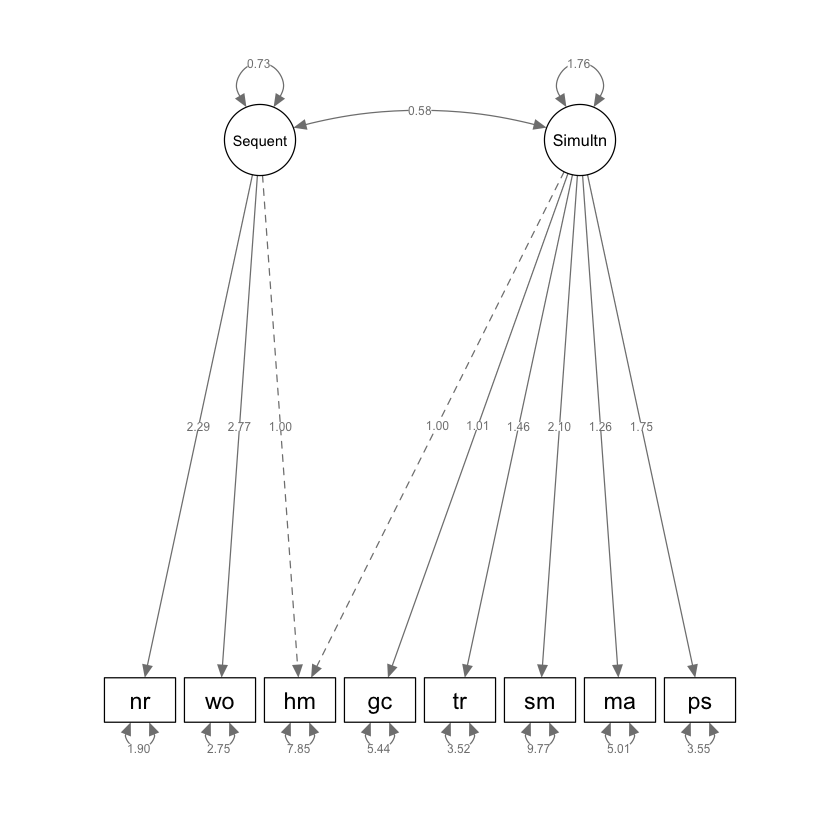

In [25]:
semPlot::semPaths(kabc3,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

In [26]:
lavaan::parameterEstimates(kabc3) |>
    print()

        lhs op      rhs   est    se     z pvalue ci.lower ci.upper
1   Sequent =~       hm 1.000 0.000    NA     NA    1.000    1.000
2   Sequent =~       nr 2.285 0.777 2.941  0.003    0.762    3.808
3   Sequent =~       wo 2.767 0.941 2.939  0.003    0.922    4.612
4  Simultan =~       hm 1.000 0.000    NA     NA    1.000    1.000
5  Simultan =~       gc 1.014 0.255 3.979  0.000    0.515    1.514
6  Simultan =~       tr 1.457 0.329 4.427  0.000    0.812    2.101
7  Simultan =~       sm 2.103 0.483 4.354  0.000    1.157    3.050
8  Simultan =~       ma 1.259 0.298 4.229  0.000    0.675    1.842
9  Simultan =~       ps 1.752 0.391 4.486  0.000    0.987    2.518
10       hm ~~       hm 7.851 0.845 9.291  0.000    6.195    9.507
11       nr ~~       nr 1.899 0.487 3.896  0.000    0.944    2.854
12       wo ~~       wo 2.750 0.713 3.856  0.000    1.352    4.148
13       gc ~~       gc 5.444 0.585 9.297  0.000    4.296    6.591
14       tr ~~       tr 3.521 0.457 7.702  0.000    2.625    4

In [27]:
fitMeasures(kabc3, c("chisq", "df", "cfi", "tli", "rmsea", "srmr")) |>
    print()

 chisq     df    cfi    tli  rmsea   srmr 
18.108 18.000  1.000  1.000  0.005  0.035 


In [28]:
lavaan::residuals(kabc3, type = "standardized.mplus") |>
    print()

$type
[1] "standardized.mplus"

$cov
       hm     nr     wo     gc     tr     sm     ma     ps
hm  0.000                                                 
nr  1.165  0.000                                          
wo -1.637  0.000  0.000                                   
gc -1.066 -1.919 -0.939  0.000                            
tr -1.710 -0.763 -0.247  0.603  0.000                     
sm  1.325  0.287  0.044 -0.867 -0.304  0.000              
ma  1.730  1.428  1.029  0.258 -0.298  0.338  0.000       
ps -0.512 -1.059  1.285  1.035  1.088 -0.361 -2.181  0.008



In [29]:
lavTestLRT(kabc2, kabc3)

,Df,AIC,BIC,Chisq,Chisq diff,RMSEA,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
kabc3,18,7573.864,7633.234,18.10764,NA,NA,NA,NA
kabc2,19,7592.082,7648.153,38.32476,20.21711,0.3099767,1,6.913179e-06


In [30]:
standardizedSolution(kabc3)

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sequent,=~,hm,0.2525852,0.08220770,3.072524,2.122564e-03,0.09146104,0.4137093
Sequent,=~,nr,0.8177224,0.05332037,15.336023,0.000000e+00,0.71321642,0.9222284
Sequent,=~,wo,0.8193490,0.05332364,15.365586,0.000000e+00,0.71483657,0.9238614
Simultan,=~,hm,0.3911086,0.07920465,4.937950,7.894795e-07,0.23587038,0.5463469
Simultan,=~,gc,0.4995366,0.06083478,8.211366,2.220446e-16,0.38030263,0.6187706
Simultan,=~,tr,0.7173667,0.04430392,16.191948,0.000000e+00,0.63053266,0.8042008
Simultan,=~,sm,0.6659828,0.04841875,13.754648,0.000000e+00,0.57108381,0.7608818
Simultan,=~,ma,0.5978172,0.05378964,11.113985,0.000000e+00,0.49239147,0.7032430
Simultan,=~,ps,0.7766255,0.03976264,19.531536,0.000000e+00,0.69869211,0.8545588


Consideriamo una parametrizzazione alternativa del modello.

In [31]:
kabc3alt_model <- "
    Sequent =~ NA*hm + nr + wo
    Simultan =~ NA*hm + gc + tr + sm + ma + ps

    Sequent ~~ 1 * Sequent
    Simultan ~~ 1 * Simultan
"

In [32]:
kabc3alt <- lavaan::sem(
    kabc3alt_model, sample.cov = kabc.cov, sample.nobs = 200, std.lv = TRUE
)

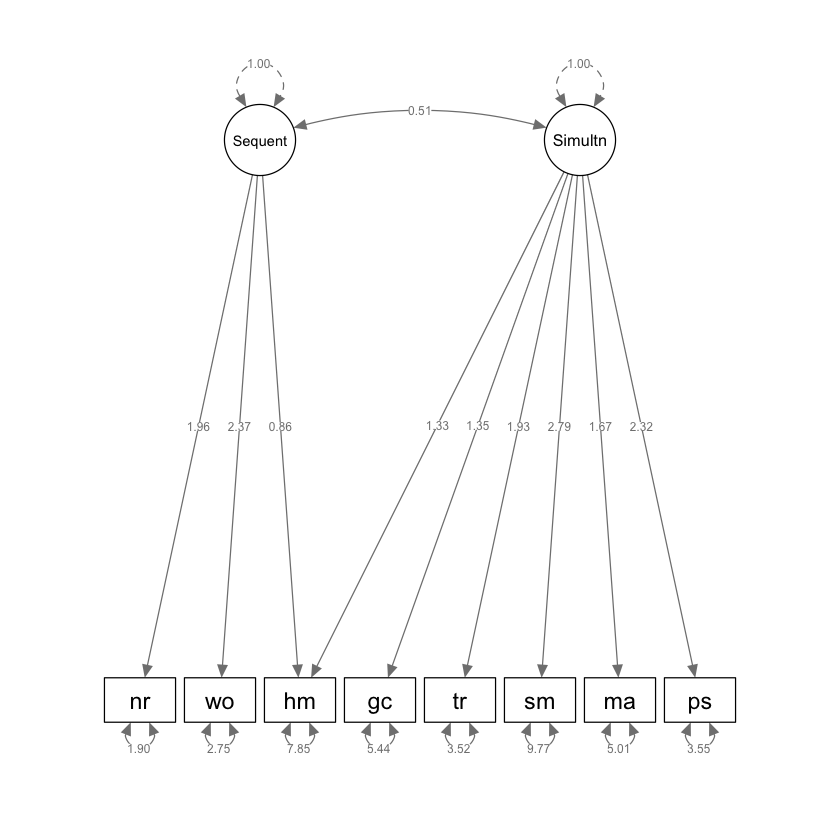

In [33]:
semPlot::semPaths(kabc3alt,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

In [34]:
loadings <- standardizedSolution(kabc3alt)
loadings

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sequent,=~,hm,0.2525843,0.08220772,3.072513,2.122649e-03,0.09146008,0.4137084
Sequent,=~,nr,0.8177223,0.05332042,15.336006,0.000000e+00,0.71321623,0.9222284
Sequent,=~,wo,0.8193488,0.05332369,15.365569,0.000000e+00,0.71483633,0.9238614
Simultan,=~,hm,0.3911092,0.07920463,4.937959,7.894445e-07,0.23587098,0.5463474
Simultan,=~,gc,0.4995384,0.06083464,8.211414,2.220446e-16,0.38030467,0.6187721
Simultan,=~,tr,0.7173674,0.04430383,16.191995,0.000000e+00,0.63053351,0.8042013
Simultan,=~,sm,0.6659822,0.04841876,13.754631,0.000000e+00,0.57108320,0.7608813
Simultan,=~,ma,0.5978175,0.05378959,11.114002,0.000000e+00,0.49239189,0.7032432
Simultan,=~,ps,0.7766261,0.03976255,19.531596,0.000000e+00,0.69869292,0.8545593


In [35]:
relevant_loadings <- loadings[loadings$op == "=~", c("lhs", "rhs", "est.std")]
relevant_loadings

,lhs,rhs,est.std
,<chr>,<chr>,<dbl>
1,Sequent,hm,0.2525843
2,Sequent,nr,0.8177223
3,Sequent,wo,0.8193488
4,Simultan,hm,0.3911092
5,Simultan,gc,0.4995384
6,Simultan,tr,0.7173674
7,Simultan,sm,0.6659822
8,Simultan,ma,0.5978175
9,Simultan,ps,0.7766261


Idealmente, un fattore dovrebbe spiegare almeno il 50% della varianza in un indicatore continuo per sostenere l'ipotesi di validità convergente (Bagozzi & Yi, 2012). Questo significa che, idealmente, tutti gli indicatori di un fattore dovrebbero mostrare un risultato in cui il fattore spiega la maggioranza della loro varianza. Un criterio meno stringente per valutare la validità convergente è l'utilizzo della Varianza Media Estratta (AVE), che è la media dei quadrati dei carichi fattoriali standardizzati per tutti gli indicatori di un dato fattore. Un AVE superiore a 0.50 indica che, in media, il fattore comune spiega più varianza rispetto a quella residua nei termini di errore dell'indicatore, come suggerito da Hair e altri nel 2022.

Nel modello a due fattori esaminato nella Tabella 14.3, i risultati sono problematici secondo il primo standard: il modello non spiega la maggioranza della varianza (R^2 > 0.50) per quattro degli otto indicatori, ovvero per metà di essi. Tuttavia, utilizzando il criterio AVE, i risultati sono leggermente migliori per il fattore sequenziale, che spiega in media circa il 52% della varianza dei suoi tre indicatori (AVE = 0.517).

Tuttavia, nella pratica reale, valori di R^2 inferiori sono spesso accettabili nell'analisi fattoriale. Ad esempio, Comrey e Lee (1992) hanno proposto la seguente scala graduata di valutazione: un R^2 superiore a 0.50 è considerato eccellente, mentre valori approssimativamente uguali a 0.40, 0.30, 0.20 e 0.10 sono classificati come molto buoni, buoni, sufficienti e scarsi, rispettivamente. Seguendo queste linee guida più flessibili, i risultati per gli indicatori nel modello CFA a due fattori della KABC-I sono "eccellenti" (R^2 > 0.50) per tre degli otto indicatori, nessuno è classificato come "scarso" (R^2 intorno a 0.10), e i restanti cinque indicatori mostrano valori intermedi. È importante sottolineare che queste linee guida non dovrebbero essere applicate in modo indiscriminato in tutti i contesti di CFA o con tutti i tipi di indicatori. Gli indicatori continui, come i punteggi totali nell'esempio citato, tendono ad avere carichi fattoriali più elevati rispetto agli indicatori ordinali, come quelli basati su scale di risposta di tipo Likert. La CFA a livello categoriale sarà trattata più dettagliatamente in un capitolo successivo.

## Otto Misure di Personalità

Ripetiamo qui l'esercizio che abbiamo svolg in precedenza usando l'analisi fattoriale esplorativa, questa volta usando `lavaan`. Consideriamo nuovamente i dati di {cite:t}`brown2015confirmatory` relativi a otto misure di personalità raccolte su un campione di 250 pazienti che hanno concluso un programma di psicoterapia:

- anxiety (N1), 
- hostility (N2), 
- depression (N3), 
- self-consciousness (N4), 
- warmth (E1), 
- gregariousness (E2), 
- assertiveness (E3), 
- positive emotions (E4). 

In [36]:
varnames <- c("N1", "N2", "N3", "N4", "E1", "E2", "E3", "E4")
sds <- "5.7  5.6  6.4  5.7  6.0  6.2  5.7  5.6"

cors <- "
 1.000
 0.767  1.000
 0.731  0.709  1.000
 0.778  0.738  0.762  1.000
-0.351  -0.302  -0.356  -0.318  1.000
-0.316  -0.280  -0.300  -0.267  0.675  1.000
-0.296  -0.289  -0.297  -0.296  0.634  0.651  1.000
-0.282  -0.254  -0.292  -0.245  0.534  0.593  0.566  1.000"

psychot_cor_mat <- getCov(cors, names = varnames)
n <- 250

Il modello con due fattori ortogonali può essere adattato ai dati nel modo seguente.

In [37]:
cfa_mod <- "
  N =~ N1 + N2 + N3 + N4
  E =~ E1 + E2 + E3 + E4
"

In [38]:
fit_cfa <- lavaan::cfa(
    cfa_mod,
    sample.cov = psychot_cor_mat,
    sample.nobs = n,
    orthogonal = TRUE,
    std.lv = TRUE
)

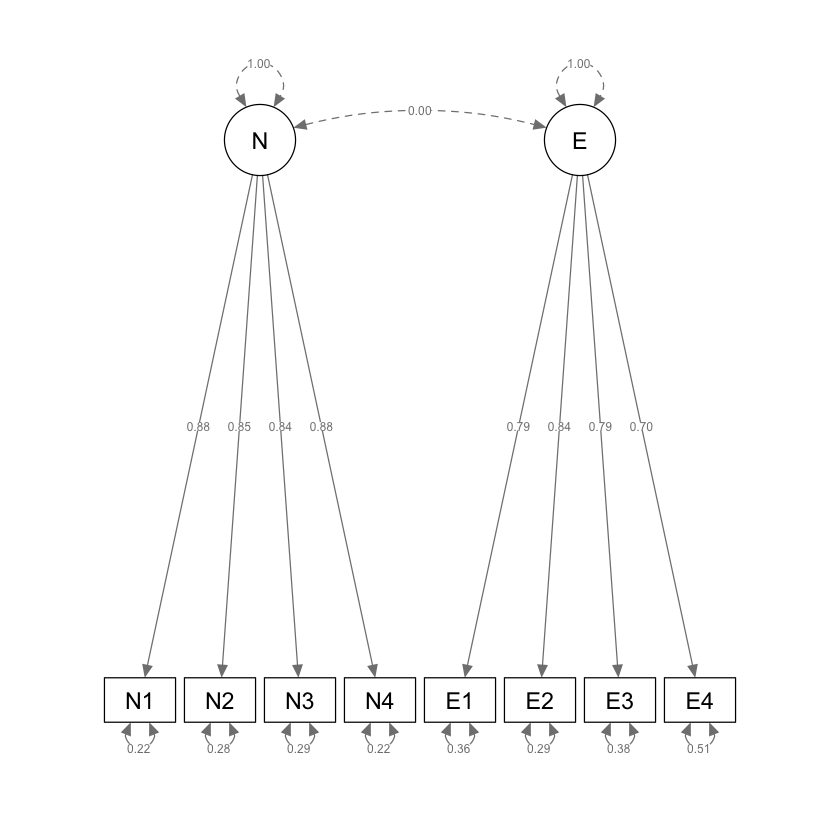

In [39]:
semPlot::semPaths(fit_cfa,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

Esaminiamo le saturazioni fattoriali:

In [40]:
parameterEstimates(fit_cfa, standardized = TRUE) %>%
    dplyr::filter(op == "=~") %>%
    dplyr::select(
        "Latent Factor" = lhs,
        Indicator = rhs,
        B = est,
        SE = se,
        Z = z,
        "p-value" = pvalue,
        Beta = std.all
    ) %>%
    knitr::kable(
        digits = 3, booktabs = TRUE, format = "markdown",
        caption = "Factor Loadings"
    )



Table: Factor Loadings

|Latent Factor |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-------------|:---------|-----:|-----:|------:|-------:|-----:|
|N             |N1        | 0.882| 0.051| 17.422|       0| 0.884|
|N             |N2        | 0.847| 0.052| 16.340|       0| 0.849|
|N             |N3        | 0.840| 0.052| 16.134|       0| 0.842|
|N             |N4        | 0.882| 0.051| 17.432|       0| 0.884|
|E             |E1        | 0.795| 0.056| 14.276|       0| 0.796|
|E             |E2        | 0.838| 0.054| 15.369|       0| 0.839|
|E             |E3        | 0.788| 0.056| 14.097|       0| 0.789|
|E             |E4        | 0.697| 0.058| 11.942|       0| 0.699|

Il risultato sembra sensato: le saturazioni su ciascun fattore sono molto alte. Tuttavia, la matrice delle correlazioni residue

In [41]:
cor_table <- residuals(fit_cfa, type = "cor")$cov
knitr::kable(
    cor_table,
    digits = 3,
    format = "markdown",
    booktabs = TRUE
)



|   |     N1|     N2|     N3|     N4|     E1|     E2|     E3|     E4|
|:--|------:|------:|------:|------:|------:|------:|------:|------:|
|N1 |  0.000|  0.017| -0.013| -0.003| -0.351| -0.316| -0.296| -0.282|
|N2 |  0.017|  0.000| -0.006| -0.012| -0.302| -0.280| -0.289| -0.254|
|N3 | -0.013| -0.006|  0.000|  0.018| -0.356| -0.300| -0.297| -0.292|
|N4 | -0.003| -0.012|  0.018|  0.000| -0.318| -0.267| -0.296| -0.245|
|E1 | -0.351| -0.302| -0.356| -0.318|  0.000|  0.007|  0.006| -0.022|
|E2 | -0.316| -0.280| -0.300| -0.267|  0.007|  0.000| -0.011|  0.007|
|E3 | -0.296| -0.289| -0.297| -0.296|  0.006| -0.011|  0.000|  0.015|
|E4 | -0.282| -0.254| -0.292| -0.245| -0.022|  0.007|  0.015|  0.000|

rivela che il modello ipotizzato dall'analisi fattoriale confermativa non è adeguato.

In [42]:
fit2_cfa <- lavaan::cfa(
    cfa_mod,
    sample.cov = psychot_cor_mat,
    sample.nobs = n,
    orthogonal = FALSE,
    std.lv = TRUE
)

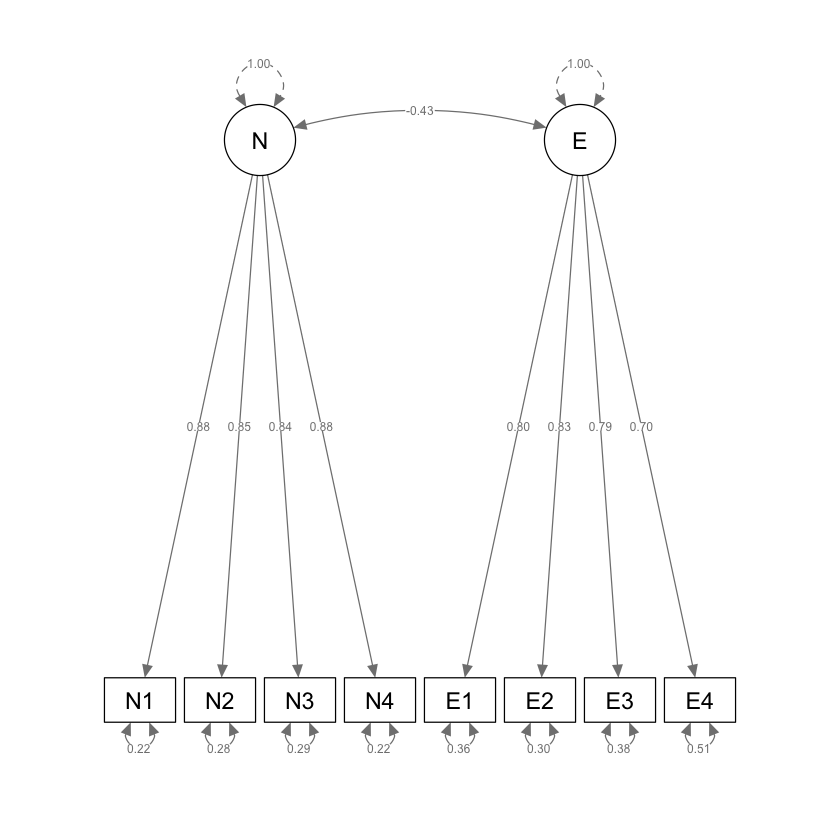

In [43]:
semPlot::semPaths(fit2_cfa,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

Esaminiamo le saturazioni fattoriali.

In [44]:
parameterEstimates(fit2_cfa, standardized = TRUE) %>%
    dplyr::filter(op == "=~") %>%
    dplyr::select(
        "Latent Factor" = lhs,
        Indicator = rhs,
        B = est,
        SE = se,
        Z = z,
        "p-value" = pvalue,
        Beta = std.all
    ) %>%
    knitr::kable(
        digits = 3, booktabs = TRUE, format = "markdown",
        caption = "Factor Loadings"
    )



Table: Factor Loadings

|Latent Factor |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-------------|:---------|-----:|-----:|------:|-------:|-----:|
|N             |N1        | 0.883| 0.051| 17.472|       0| 0.885|
|N             |N2        | 0.847| 0.052| 16.337|       0| 0.849|
|N             |N3        | 0.842| 0.052| 16.190|       0| 0.844|
|N             |N4        | 0.880| 0.051| 17.381|       0| 0.882|
|E             |E1        | 0.800| 0.055| 14.465|       0| 0.802|
|E             |E2        | 0.832| 0.054| 15.294|       0| 0.834|
|E             |E3        | 0.788| 0.056| 14.150|       0| 0.789|
|E             |E4        | 0.698| 0.058| 11.974|       0| 0.699|

Esaminiamo i residui.

In [45]:
cor_table <- residuals(fit2_cfa, type = "cor")$cov
knitr::kable(
    cor_table,
    digits = 3,
    format = "markdown",
    booktabs = TRUE
)



|   |     N1|     N2|     N3|     N4|     E1|     E2|     E3|     E4|
|:--|------:|------:|------:|------:|------:|------:|------:|------:|
|N1 |  0.000|  0.016| -0.015| -0.002| -0.042|  0.005|  0.008| -0.013|
|N2 |  0.016|  0.000| -0.007| -0.010| -0.006|  0.028|  0.002|  0.004|
|N3 | -0.015| -0.007|  0.000|  0.018| -0.062|  0.006| -0.007| -0.035|
|N4 | -0.002| -0.010|  0.018|  0.000| -0.010|  0.053|  0.007|  0.023|
|E1 | -0.042| -0.006| -0.062| -0.010|  0.000|  0.006|  0.001| -0.027|
|E2 |  0.005|  0.028|  0.006|  0.053|  0.006|  0.000| -0.007|  0.010|
|E3 |  0.008|  0.002| -0.007|  0.007|  0.001| -0.007|  0.000|  0.014|
|E4 | -0.013|  0.004| -0.035|  0.023| -0.027|  0.010|  0.014|  0.000|

Sistemiamo le saturazioni fattoriali in una matrice 8 $\times$ 2:

In [46]:
lambda <- inspect(fit2_cfa, what = "std")$lambda
lambda

,N,E
N1,0.8848214,0.0000000
N2,0.8485128,0.0000000
N3,0.8436432,0.0000000
N4,0.8819736,0.0000000
E1,0.0000000,0.8018485
E2,0.0000000,0.8337599
E3,0.0000000,0.7894530
E4,0.0000000,0.6990366


Otteniamo la matrice di intercorrelazoni fattoriali.

In [47]:
Phi <- inspect(fit2_cfa, what = "std")$psi
Phi

,N,E
N,1.000000,-0.434962
E,-0.434962,1.000000


Otteniamo la matrice di varianze residue.

In [48]:
Psi <- inspect(fit2_cfa, what = "std")$theta
Psi

,N1,N2,N3,N4,E1,E2,E3,E4
N1,0.217091,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000
N2,0.000000,0.2800261,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000
N3,0.000000,0.0000000,0.2882661,0.0000000,0.000000,0.0000000,0.000000,0.0000000
N4,0.000000,0.0000000,0.0000000,0.2221225,0.000000,0.0000000,0.000000,0.0000000
E1,0.000000,0.0000000,0.0000000,0.0000000,0.357039,0.0000000,0.000000,0.0000000
E2,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.3048445,0.000000,0.0000000
E3,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.376764,0.0000000
E4,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.5113478


Mediante i parametri del modello  la matrice di correlazione si riproduce nel modo seguente:

$$
\boldsymbol{\Sigma} =\boldsymbol{\Lambda} \boldsymbol{\Phi} \boldsymbol{\Lambda}^{\mathsf{T}} + \boldsymbol{\Psi}. 
$$

In $\textsf{R}$ scriviamo:

In [49]:
R_hat <- lambda %*% Phi %*% t(lambda) + Psi
R_hat %>%
    round(3)

,N1,N2,N3,N4,E1,E2,E3,E4
N1,1.000,0.751,0.746,0.780,-0.309,-0.321,-0.304,-0.269
N2,0.751,1.000,0.716,0.748,-0.296,-0.308,-0.291,-0.258
N3,0.746,0.716,1.000,0.744,-0.294,-0.306,-0.290,-0.257
N4,0.780,0.748,0.744,1.000,-0.308,-0.320,-0.303,-0.268
E1,-0.309,-0.296,-0.294,-0.308,1.000,0.669,0.633,0.561
E2,-0.321,-0.308,-0.306,-0.320,0.669,1.000,0.658,0.583
E3,-0.304,-0.291,-0.290,-0.303,0.633,0.658,1.000,0.552
E4,-0.269,-0.258,-0.257,-0.268,0.561,0.583,0.552,1.000


Le correlazioni residue sono:

In [50]:
(psychot_cor_mat - R_hat) %>%
    round(3)

,N1,N2,N3,N4,E1,E2,E3,E4
N1,0.000,0.016,-0.015,-0.002,-0.042,0.005,0.008,-0.013
N2,0.016,0.000,-0.007,-0.010,-0.006,0.028,0.002,0.004
N3,-0.015,-0.007,0.000,0.018,-0.062,0.006,-0.007,-0.035
N4,-0.002,-0.010,0.018,0.000,-0.010,0.053,0.007,0.023
E1,-0.042,-0.006,-0.062,-0.010,0.000,0.006,0.001,-0.027
E2,0.005,0.028,0.006,0.053,0.006,0.000,-0.007,0.010
E3,0.008,0.002,-0.007,0.007,0.001,-0.007,0.000,0.014
E4,-0.013,0.004,-0.035,0.023,-0.027,0.010,0.014,0.000


Calcoliamo la correlazione predetta dal modello tra le variabili $Y_1$ e $Y_2$:

In [51]:
lambda[1, 1] * lambda[2, 1] + lambda[1, 2] * lambda[2, 2] +
    lambda[1, 1] * lambda[2, 2] * Phi[1, 2] +
    lambda[1, 2] * lambda[2, 1] * Phi[1, 2]

[1] 0.7507823

Questo risultato è molto simile al valore contenuto dell'elemento (1, 2) della
matrice di correlazioni osservate:

In [52]:
psychot_cor_mat[1, 2]

[1] 0.767

Usando le funzonalità di `lavaan` la matrice di correlazione predetta si ottiene con:

In [53]:
fitted(fit2_cfa)$cov |>
    print()

       N1     N2     N3     N4     E1     E2     E3     E4
N1  0.996                                                 
N2  0.748  0.996                                          
N3  0.743  0.713  0.996                                   
N4  0.777  0.745  0.741  0.996                            
E1 -0.307 -0.295 -0.293 -0.306  0.996                     
E2 -0.320 -0.306 -0.305 -0.319  0.666  0.996              
E3 -0.303 -0.290 -0.289 -0.302  0.630  0.656  0.996       
E4 -0.268 -0.257 -0.255 -0.267  0.558  0.580  0.550  0.996


La matrice dei residui è

In [54]:
resid(fit2_cfa)$cov |>
    print()

       N1     N2     N3     N4     E1     E2     E3     E4
N1  0.000                                                 
N2  0.016  0.000                                          
N3 -0.015 -0.007  0.000                                   
N4 -0.002 -0.010  0.018  0.000                            
E1 -0.042 -0.006 -0.062 -0.010  0.000                     
E2  0.005  0.028  0.006  0.053  0.006  0.000              
E3  0.008  0.002 -0.007  0.007  0.001 -0.007  0.000       
E4 -0.013  0.004 -0.035  0.023 -0.026  0.010  0.014  0.000


La matrice dei residui standardizzati è

In [55]:
resid(fit2_cfa, type = "standardized")$cov |>
    print()

       N1     N2     N3     N4     E1     E2     E3     E4
N1  0.000                                                 
N2  1.674  0.000                                          
N3 -1.769 -0.569  0.000                                   
N4 -0.350 -1.152  1.746  0.000                            
E1 -1.214 -0.161 -1.646 -0.294  0.000                     
E2  0.154  0.794  0.168  1.626  0.637  0.000              
E3  0.219  0.062 -0.191  0.193  0.075 -0.693  0.000       
E4 -0.314  0.092 -0.824  0.552 -1.481  0.624  0.690  0.000


I valori precedenti possono essere considerati come punti *z*, dove i valori con un valore assoluto maggiore di 2 possono essere ritenuti problematici. Tuttavia, è importante considerare che in questo modo si stanno eseguendo molteplici confronti, pertanto, si dovrebbe considerare l'opportunità di applicare una qualche forma di correzione per i confronti multipli.

## EFA con `lavaan`

Una funzionalità sperimentale di `lavaan` (ancora non ufficiale) è quella che consente di svolgere l'analisi fattoriale esplorativa con la funzione `efa()`. Consideriamo nuovamente i dati di @brown2015confirmatory, ovvero otto misure di personalità raccolte su un campione di 250 pazienti che hanno concluso un programma di psicoterapia.

Definiamo un modello ad un solo fattore comune.

In [56]:
# 1-factor model
f1 <- '
efa("efa")*f1 =~ N1 + N2 + N3 + N4 + E1 + E2 + E3 + E4
'

Definiamo un modello con due fattori comuni.

In [57]:
# 2-factor model
f2 <- '
efa("efa")*f1 +
efa("efa")*f2 =~ N1 + N2 + N3 + N4 + E1 + E2 + E3 + E4
'

Adattiamo ai dati il modello ad un fattore comune.

In [58]:
efa_f1 <-
    cfa(
        model = f1,
        sample.cov = psychot_cor_mat,
        sample.nobs = 250,
        rotation = "oblimin"
    )

Esaminiamo la soluzione ottenuta.

In [59]:
summary(
    efa_f1,
    fit.measures = TRUE,
    standardized = TRUE,
    rsquare = TRUE
) |>
    print()

lavaan 0.6.17 ended normally after 2 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        16

  Rotation method                      OBLIMIN OBLIQUE
  Oblimin gamma                                      0
  Rotation algorithm (rstarts)                GPA (30)
  Standardized metric                             TRUE
  Row weights                                     None

  Number of observations                           250

Model Test User Model:
                                                      
  Test statistic                               375.327
  Degrees of freedom                                20
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              1253.791
  Degrees of freedom                                28
  P-value                                        0.000

User Model vers

Adattiamo ai dati il modello a due fattori comuni.

In [60]:
efa_f2 <-
    cfa(
        model = f2,
        sample.cov = psychot_cor_mat,
        sample.nobs = 250,
        rotation = "oblimin"
    )

Esaminiamo la soluzione ottenuta.

In [61]:
summary(
    efa_f2,
    fit.measures = TRUE,
    standardized = TRUE,
    rsquare = TRUE
) |>
    print()

lavaan 0.6.17 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        23

  Rotation method                      OBLIMIN OBLIQUE
  Oblimin gamma                                      0
  Rotation algorithm (rstarts)                GPA (30)
  Standardized metric                             TRUE
  Row weights                                     None

  Number of observations                           250

Model Test User Model:
                                                      
  Test statistic                                 9.811
  Degrees of freedom                                13
  P-value (Chi-square)                           0.709

Model Test Baseline Model:

  Test statistic                              1253.791
  Degrees of freedom                                28
  P-value                                        0.000

User Model versu

Anche se abbiamo introdotto finora soltanto la misura di bontà di adattamento del chi-quadrato, aggiungiamo qui il calcolo di altre misure di bontà di adattamento che discuteremo in seguito.

In [62]:
fit_measures_robust <- c(
    "chisq", "df", "pvalue", "cfi", "rmsea", "srmr"
)

Confrontiamo le misure di bontà di adattamento del modello che ipotizza un solo fattore comune e il modello che ipotizza la presenza di due fattori comuni.

In [63]:
# collect them for each model
rbind(
    fitmeasures(efa_f1, fit_measures_robust),
    fitmeasures(efa_f2, fit_measures_robust)
) %>%
    # wrangle
    data.frame() %>%
    mutate(
        chisq = round(chisq, digits = 0),
        df = as.integer(df),
        pvalue = ifelse(pvalue == 0, "< .001", pvalue)
    ) %>%
    mutate_at(vars(cfi:srmr), ~ round(., digits = 3))

chisq,df,pvalue,cfi,rmsea,srmr
<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>
375,20,< .001,0.71,0.267,0.187
10,13,0.709310449320098,1.00,0.000,0.010


L'evidenza empirica supporta la superiorità del modello a due fattori rispetto a quello ad un solo fattore comune. In particolare, l'analisi fattoriale esplorativa svolta mediante la funzione `efa()` evidenzia la capacità del modello a due fattori di fornire una descrizione adeguata della struttura dei dati e di distinguere in modo sensato tra i due fattori ipotizzati.

## Considerazioni Finali

La CFA è una tecnica fondamentale nell'ambito della ricerca psicologica e sociale, essenziale per esaminare modelli di misurazione riflessiva in cui i fattori comuni fungono da proxy per variabili teoriche. Questa tecnica si basa su un approccio predeterminato, richiedendo al ricercatore di specificare a priori il numero di fattori, la corrispondenza tra fattori e indicatori, e gli eventuali schemi di covarianza degli errori. Nei modelli CFA di base, gli indicatori continui dipendono da un singolo fattore e presentano errori indipendenti, configurando una misurazione unidimensionale. La valutazione di tali modelli con molteplici fattori consente di testare le ipotesi di validità convergente e discriminante.

È anche possibile esaminare modelli CFA con covarianze di errore o indicatori che saturano su più di un fattore. Tuttavia, confrontarsi con tali modelli risulta più complesso, specialmente nella determinazione della loro identificazione, rispetto ai modelli di base. Problemi tecnici come la non convergenza o soluzioni inammissibili sono più frequenti in campioni ridotti, in particolare quando alcuni fattori sono definiti da soli due indicatori. La rielaborazione del modello può essere impegnativa, data la vasta gamma di possibili modifiche applicabili a un modello CFA specifico.

Un'ulteriore problematica riguarda i modelli CFA equivalenti, che possono portare a risultati simili nonostante strutture diverse. Per affrontare efficacemente queste sfide, è fondamentale basarsi più su conoscenze sostanziali che su considerazioni statistiche. L'analisi dovrebbe essere guidata da una solida comprensione del dominio di studio. In definitiva, mentre la CFA offre strumenti potenti per l'indagine dei costrutti teorici, la sua efficacia dipende fortemente dal contesto teorico e dalla competenza metodologica del ricercatore.

## Esercizi 

**E1.** Si utilizzino i dati `dass21.txt` che corrispondono alla somministrazione del test DASS-21 a 334 partecipanti. Lo schema di codifica si può trovare seguendo questo [link](https://maic.qld.gov.au/wp-content/uploads/2016/07/DASS-21.pdf). Si adatti ai dati un modello a tre fattori usando l'analisi fattoriale esplorativa con la funzione `lavaan::efa()`. Usando le saturazioni fattoriali e la matrice di inter-correlazioni fattoriali, si trovi la matrice di correlazioni riprodotta dal modello. Senza usare l'albebra matriciale, si trovi la correlazione predetta tra gli indicatori DASS-1 e DASS-2.